# 🗣️ Day 6 - Spam Email Detection with NLP

In this project, we’ll build a text classification model that detects whether an email (or SMS) is **spam** or **ham (not spam)** using real-world text data.

In [24]:
# Import Required Libraries

# Data handling
import pandas as pd
import numpy as np

# Text and string processing
import string

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning tools from scikit-learn
from sklearn.model_selection import train_test_split         # Split dataset into train and test
from sklearn.feature_extraction.text import TfidfVectorizer   # Convert text to numeric vectors using TF-IDF
from sklearn.linear_model import LogisticRegression           # Logistic Regression classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics

# Natural Language Processing (NLP) tools from NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download stopwords dataset (run once)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\slerx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Load Dataset

# Load the SMS Spam Collection Dataset (TSV format) from a local file
df = pd.read_csv('sms.tsv', sep='\t', header=None, names=['label', 'message'])

# Or Load the dataset directly from a GitHub URL (TSV format) (Need active Internet Connection)
# url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
# df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

In [32]:
# Explore Dataset
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [49]:
print(df.shape)           # (5572, 2)
print(df['label'].value_counts())  # Count of spam and ham


(5572, 3)
label
ham     4825
spam     747
Name: count, dtype: int64


In [50]:
print(df.tail(10))  # Last 10 rows
print("\n",df.isnull().sum())  # Check for NaNs in each column
print("\nTotal rows loaded:", df.shape[0])

     label                                            message  \
5562   ham  Ok lor... Sony ericsson salesman... I ask shuh...   
5563   ham                                Ard 6 like dat lor.   
5564   ham  Why don't you wait 'til at least wednesday to ...   
5565   ham                                       Huh y lei...   
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...   
5567  spam  This is the 2nd time we have tried 2 contact u...   
5568   ham               Will ü b going to esplanade fr home?   
5569   ham  Pity, * was in mood for that. So...any other s...   
5570   ham  The guy did some bitching but I acted like i'd...   
5571   ham                         Rofl. Its true to its name   

                                                cleaned  
5562  ok lor soni ericsson salesman ask shuhui say q...  
5563                                 ard 6 like dat lor  
5564              dont wait til least wednesday see get  
5565                                            huh 

In [51]:
# Drop rows with missing data (just to be sure)
df.dropna(inplace=True)

# Re-check shape
print(df.shape)


(5572, 3)


In [52]:
# Show how many messages are spam vs ham
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


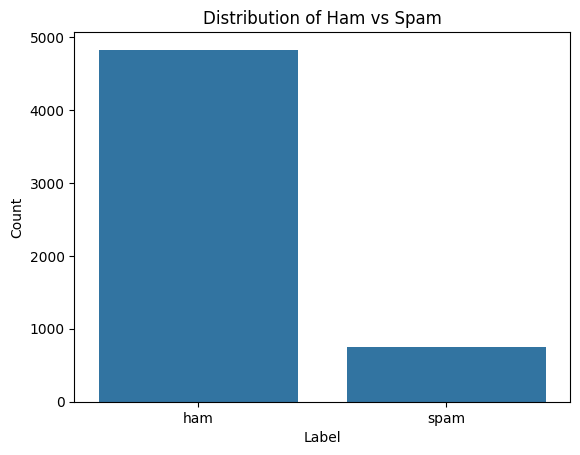

In [53]:
# Visualize the distribution of spam and ham messages
sns.countplot(data=df, x='label')
plt.title("Distribution of Ham vs Spam")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

This tells us our dataset is imbalanced, meaning:

* More ham than spam

* We'll need to consider this during model evaluation (like using precision/recall, not just accuracy)

In [54]:
# Preprocessing the Text

# Initialize Porter Stemmer and stopwords set
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define a function to clean each message
def clean_text(text):
    # 1. Convert text to lowercase
    text = text.lower()
    
    # 2. Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # 3. Tokenize by splitting on whitespace
    tokens = text.split()
    
    # 4. Remove stopwords and stem each token
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    # 5. Join tokens back to a single string
    return ' '.join(tokens)

# Apply cleaning function to all messages and save as a new column
df['cleaned'] = df['message'].apply(clean_text)

# Preview the original and cleaned text side-by-side
print(df[['message', 'cleaned']].head())


                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                             cleaned  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


In [55]:
# Features (X) = cleaned text messages
X = df['cleaned']

# Labels (y) = map 'ham' to 0, 'spam' to 1 for binary classification
y = df['label'].map({'ham': 0, 'spam': 1})

In [56]:
# Split dataset into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit TF-IDF on training data and transform it into vectors
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform test data using the same fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

In [65]:
print(X_train)
print(y_train)
print(X_train_tfidf)
print(X_test_tfidf)


1978    repli win £100 weekli 2006 fifa world cup held...
3989    hello sort town alreadi dont rush home eat nac...
3935                        come guoyang go n tell u told
4078    hey sathya till dint meet even singl time saw ...
4086    orang bring rington time chart hero free hit w...
                              ...                        
3772    hi wlcome back wonder got eaten lion someth no...
5191                                 sorri ill call later
5226                prabhaim sorydarealyfrm heart im sori
5390                                 nt joke serious told
860                               say somebodi name tampa
Name: cleaned, Length: 4457, dtype: object
1978    1
3989    0
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: label, Length: 4457, dtype: int64
  (np.int32(0), np.int32(5267))	0.18896866898611764
  (np.int32(0), np.int32(6856))	0.21574107425296984
  (np.int32(0), np.int32(251))	0.24104159008714748
  (np.int32(0)

In [68]:
# Initialize the Logistic Regression model
model = LogisticRegression(class_weight='balanced')
# Automatically assigns more weight to the minority class (spam) so the model pays more attention to it.

# Train the model using the TF-IDF vectors and labels from the training set
model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced')

Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.91      0.93      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



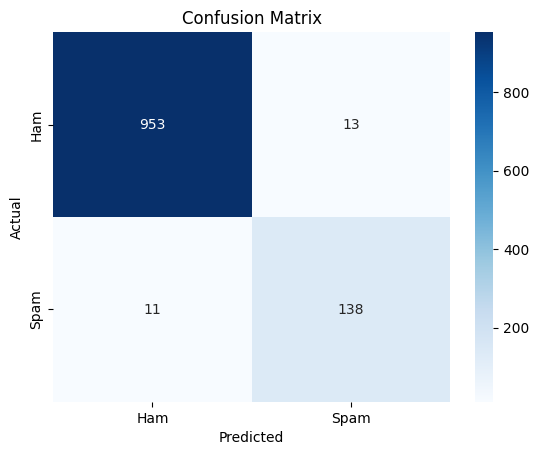

In [69]:
# Predict labels for the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [70]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Initialize the oversampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

# Show before and after class distribution
print("Before Oversampling:", Counter(y_train))
print("After Oversampling: ", Counter(y_train_resampled))


Before Oversampling: Counter({0: 3859, 1: 598})
After Oversampling:  Counter({1: 3859, 0: 3859})


d:\Programming\Machine-Learning\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Programming\Machine-Learning\venv\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
d:\Programming\Machine-Learning\venv\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [71]:
# Initialize and train model on balanced data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Accuracy: 0.979372197309417

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.92      0.92       149

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



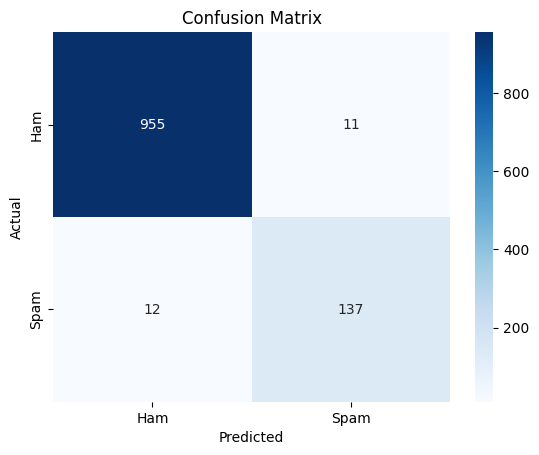

In [72]:
# Predict on original test set
y_pred = model.predict(X_test_tfidf)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()